# Predict smoothed female velocity inferred neural population activity.

Using ridge regression

In [2]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import linear_model
import sys

from disp import set_plot
from my_torch import skl_fit_ridge

cc = np.concatenate

STRAINS = ['NM91', 'ZH23']
PTRAIN = .8
NSPLIT = 30

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'ln'  # linear-nonlinear model
NRL_MDL = 'dyn'  # dynamical neural model

TARGS = ['FFV_MN_60', 'FFV']
# TARGS = ['FLS_MN_60', 'FLS']

FIT_LIN = skl_fit_ridge

ALPHA = 10
FIT_KWARGS = {'alpha': ALPHA}

In [3]:
FSTRAIN = 'data/simple/strains.csv'
FBAKER_FIT_PARAM = f'data/simple/neur/baker_{NRL_MDL}_fit_param.csv'

FPFX_NEUR_BHV = f'data/simple/mlv/neur_basic/baker_{NRL_MDL}/mlv_baker_{NRL_MDL}'
FPFX_BHV_XTD = f'data/simple/behav_xtd/behav_xtd'

FSAVE = f'data/simple/mlv/neur_basic/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARGS[0].lower()}_ridge_alpha_{ALPHA}.npy'

DFBAKER_FIT_PARAM = pd.read_csv(FBAKER_FIT_PARAM)
R_COLS_USE = [f'R_{ir}' for ir in DFBAKER_FIT_PARAM.EXPT_ID]

MSTRAINS = [(pd.read_csv(FSTRAIN)['STRAIN'] == strain) for strain in STRAINS]
MSTRAIN = np.any(MSTRAINS, axis=0)
ISTRAIN = MSTRAIN.nonzero()[0]

NTR = MSTRAIN.sum()
NTRAIN = int(round(PTRAIN*NTR))

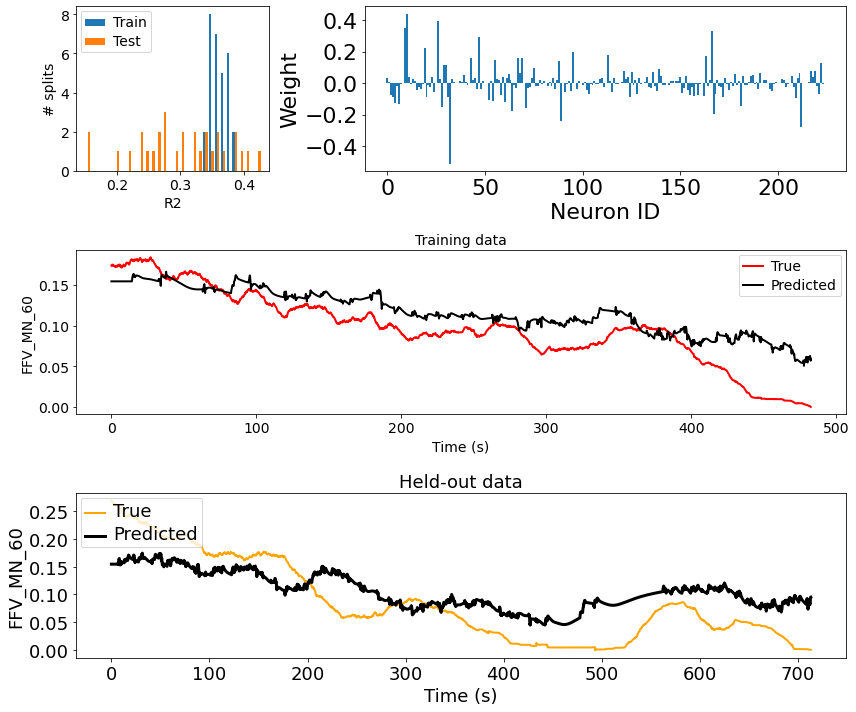

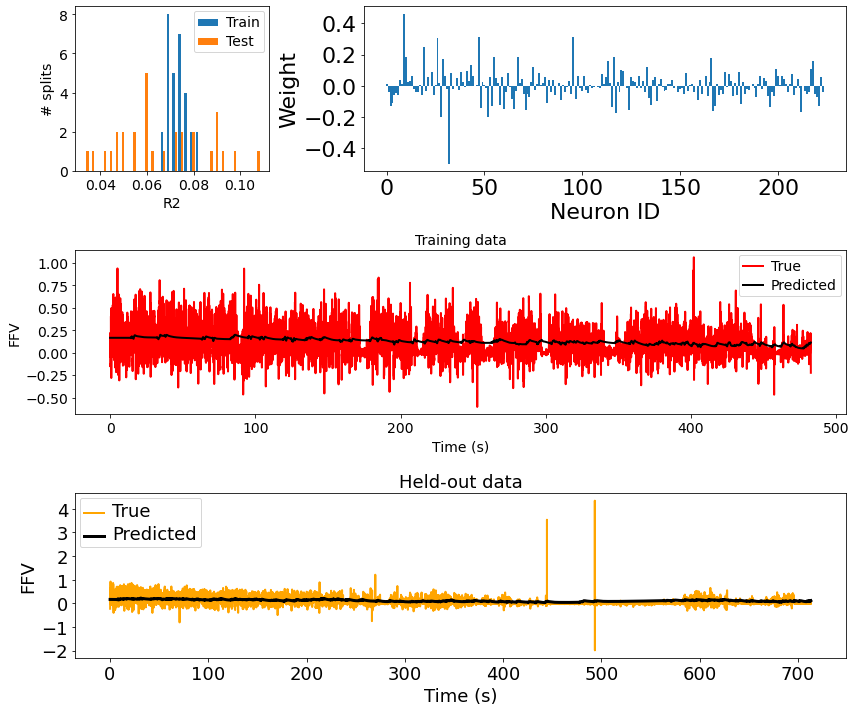

In [7]:
TRAIN_IDX_PLOT = 12
TEST_IDX_PLOT = 16

data = np.load(FSAVE, allow_pickle=True)[0]

for targ in TARGS:
    gs = gridspec.GridSpec(3, 3)

    fig = plt.figure(figsize=(12, 10), tight_layout=True)
    axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:]), fig.add_subplot(gs[1, :]), fig.add_subplot(gs[2, :])]

    axs[0].hist(np.transpose([data['r2_train'][targ], data['r2_test'][targ]]), bins=30)
    axs[0].legend(['Train', 'Test'])
    set_plot(axs[0], x_label='R2', y_label='# splits', font_size=14)

    axs[1].bar(np.arange(data['w'][targ].shape[1]), np.mean(data['w'][targ], axis=0), width=1)
    set_plot(axs[1], x_label='Neuron ID', y_label='Weight', font_size=22)

    axs[2].plot(np.arange(len(data['ys_train'][targ][0][TRAIN_IDX_PLOT]))/30.03, data['ys_train'][targ][0][TRAIN_IDX_PLOT], c='r', lw=2)
    axs[2].plot(np.arange(len(data['y_hats_train'][targ][0][TRAIN_IDX_PLOT]))/30.03, data['y_hats_train'][targ][0][TRAIN_IDX_PLOT], c='k', lw=2)
    axs[2].legend(['True', 'Predicted'])
    set_plot(axs[2], x_label='Time (s)', y_label=targ, title='Training data', font_size=14)

    axs[3].plot(np.arange(len(data['ys_test'][targ][0][TEST_IDX_PLOT]))/30.03, data['ys_test'][targ][0][TEST_IDX_PLOT], c='orange', lw=2)
    axs[3].plot(np.arange(len(data['y_hats_test'][targ][0][TEST_IDX_PLOT]))/30.03, data['y_hats_test'][targ][0][TEST_IDX_PLOT], c='k', lw=3)
    axs[3].legend(['True', 'Predicted'], loc='upper left')
    set_plot(axs[3], x_label='Time (s)', y_label=targ, title='Held-out data', font_size=18)
    
    fig.savefig(f'cosyne_2022/{targ}_fit.svg')